# Refitting Your Model

Previously, our model was trained using the training data.  In order to make predictions into the "real" future, our model must first be refit to the entire time series data (not just the training subset).

Recall the time series dataset containing the number of airline passengers traveling in a particular month.  Let's model the time series data then train, test and evaluate our model.

In [1]:
import pandas as pd
passengers = pd.read_csv('https://www.mathatwork.org/DATA/airpassengers.csv')

from datetime import datetime
passengers.Month = pd.to_datetime(passengers.Month)
passengers.index = passengers.Month
passengers = passengers.drop('Month', axis=1)

from pyramid.arima import auto_arima
best_arima_model = auto_arima(passengers, m=12, seasonal=True, d=1, D=1, trace=False, error_action='ignore', suppress_warnings=True)

from sklearn.metrics import r2_score
test = passengers.loc['1959-01':'1960-12']
train = passengers.loc['1949-01':'1958-12']

best_arima_model.fit(train)
arima_predict = best_arima_model.predict(n_periods=len(test))
eval_metric = r2_score(y_pred = arima_predict, y_true = test)
print(eval_metric)

0.858998147135


In the above code, *trace* is set to False and therefore the status of the fits are not displayed to the screen.  Once we get R Squared and are satisfied with the model's performance, we can use our model to make predictions about future airline passengers.
<br><br>
Refit the model to the entire *passengers* time series dataset using **.fit( )** and passing in the *passengers* series.

In [2]:
model_fitted = best_arima_model.fit(passengers)
print(model_fitted.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(2, 1, 1, 12)   Log Likelihood                -492.680
Date:                            Fri, 08 Feb 2019   AIC                           1007.359
Time:                                    12:05:45   BIC                           1038.987
Sample:                                         0   HQIC                          1020.211
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0067      0.039      0.171      0.864      -0.070       0.083
ar.L1         -0.2695      0.090   

Printing the fitted model summary, we can verify the AIC, the order and the seasonal order.

# Making Predictions

Once the model has been refit, we can now make our projections.  It is recommended that your projections be made no further out then the length of your testing data.  That is, the testing data for our *passengers* time series is of length 24 months.

In [3]:
print(len(test))

24


Therefore, we should only make projections of no more than 24 months into the future using our refitted model.  

In [13]:
projections = model_fitted.predict(n_periods = len(test))

Let's create the date months for which we are projecting and then convert our *projections* into a DataFrame with indices equal to the future date months.

In [14]:
from dateutil.relativedelta import *

new_date = passengers.index[-1]
new_index = []

for y in range(len(test)):
    new_date = new_date + relativedelta(months=+1)
    new_index.append(new_date)
    
projections = pd.DataFrame(projections, index = new_index, columns=['Projections'])
print(projections)

            Projections
1961-01-01   456.283350
1961-02-01   416.861895
1961-03-01   469.475452
1961-04-01   501.060090
1961-05-01   506.682597
1961-06-01   579.858293
1961-07-01   672.446487
1961-08-01   654.011641
1961-09-01   558.300875
1961-10-01   505.441795
1961-11-01   428.996155
1961-12-01   484.348195
1962-01-01   505.137087
1962-02-01   458.065248
1962-03-01   514.119667
1962-04-01   551.911624
1962-05-01   553.675078
1962-06-01   637.661601
1962-07-01   732.509369
1962-08-01   707.260472
1962-09-01   612.091707
1962-10-01   554.434817
1962-11-01   469.727661
1962-12-01   532.277691


And there you have the predictions 24 months into the future.  Let's plot our *passengers* data and our *projections* data.

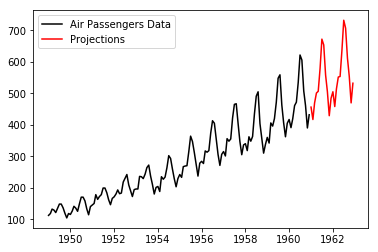

In [18]:
import matplotlib.pylab as plt

plt.plot(passengers.index, passengers.Passengers, color='black', label='Air Passengers Data')
plt.plot(projections.index, projections.Projections, color='red', label='Projections')
plt.legend(loc='best')
plt.show()

Great!  We have a nice visual of the original *passengers* data along with our model projections.  The projections indicate an upward trend in the number of airline passengers.

### Exercise

Recall the time series dataset containing monthly number of sales of shampoo over a 3 year period for a UK-based online store.

In [25]:
sales = pd.read_csv('https://mathatwork.org/DATA/sales-shampoo.csv')
print(sales.head())

     Month  Sales
0  2015-01  266.0
1  2015-02  145.9
2  2015-03  183.1
3  2015-04  119.3
4  2015-05  180.3


**1)** Model the time series data then train, test and evaluate your model.

In [26]:
sales.Month = pd.to_datetime(sales.Month)
sales.index = sales.Month
sales = sales.drop('Month', axis=1)

best_arima_model2 = auto_arima(sales, m=12, seasonal=True, d=1, D=1, trace=False, error_action='ignore', suppress_warnings=True)

test2 = sales.loc['2017-07':'2017-12']
train2 = sales.loc['2015-01':'2017-06']

best_arima_model2.fit(train2)
arima_predict2 = best_arima_model2.predict(n_periods=len(test2))
eval_metric2 = r2_score(y_pred = arima_predict2, y_true = test2)
print(eval_metric2)

-0.358795763808


**2)** Assume your R Squared is satisfactory. Refit the model to the entire *sales* data.  Print the refitted model summary.

In [27]:
model_fitted2 = best_arima_model2.fit(sales)
print(model_fitted2.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(3, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -131.001
Date:                            Fri, 08 Feb 2019   AIC                            274.003
Time:                                    13:12:54   BIC                            280.816
Sample:                                         0   HQIC                           275.716
                                             - 36                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.8897      6.578      5.152      0.000      20.997      46.783
ar.L1         -0.8234      0.249   

**3)** Make projections 6 months into the future.

In [29]:
projections2 = model_fitted2.predict(n_periods = len(test2))

Run the following code to create the date months for which you are projecting and then convert your projections into a DataFrame with indices equal to the future date months.

In [33]:
new_date = sales.index[-1]
new_index = []

for y in range(len(test2)):
    new_date = new_date + relativedelta(months=+1)
    new_index.append(new_date)
    
projections2 = pd.DataFrame(projections2, index = new_index, columns=['Projections'])
print(projections2)

            Projections
2018-01-01   679.396618
2018-02-01   639.380975
2018-03-01   650.479883
2018-04-01   760.911055
2018-05-01   767.243995
2018-06-01   729.680413


**4)** Plot your *sales* and *projections* data.

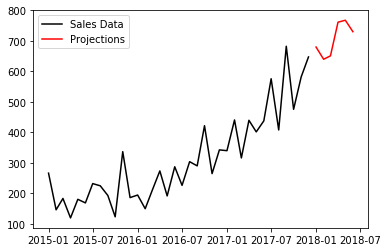

In [34]:
plt.plot(sales.index, sales.Sales, color='black', label='Sales Data')
plt.plot(projections2.index, projections2.Projections, color='red', label='Projections')
plt.legend(loc='best')
plt.show()

**5)** Do your projections indicate a trend in shampoo sales?  Explain.